In [29]:
# Import all the libraries I need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

# load the data
path1 = '/Users/dzzxjl/PycharmProjects/tianchi/titanic_test/input/train.csv'
path2 = '/Users/dzzxjl/PycharmProjects/tianchi/titanic_test/input/test.csv'
df_train = pd.read_csv(path1)
df_test = pd.read_csv(path2)
df = df_train.append(df_test , ignore_index = True)
df.info()
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex    

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [30]:
df_train.shape, df_test.shape, df_train.columns.values


((891, 12),
 (418, 11),
 array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))

In [31]:
df['Pclass'].isnull().sum(axis=0)

0

In [32]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum()
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [33]:
df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [34]:
df['Title'] = df.Name.map(lambda x : x.split(',')[1].split('.')[0].strip())

In [35]:
df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Jonkheer          1
Dona              1
Sir               1
Mme               1
Don               1
Lady              1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [40]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss') 
             & (df.Title !=  'Mrs')] = 'Others'

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [42]:
df.Title.value_counts()

Mr        757
Miss      262
Mrs       201
Master     61
Others     28
Name: Title, dtype: int64

In [43]:
df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1).drop(labels=['Name'], axis=1)


In [44]:
df

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Master,Miss,Mr,Mrs,Others
0,22.0,NaN,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Mr,0,0,1,0,0
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs,0,0,0,1,0
2,26.0,NaN,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,1,0,0,0
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,113803,Mrs,0,0,0,1,0
4,35.0,NaN,S,8.0500,0,5,3,male,0,0.0,373450,Mr,0,0,1,0,0
5,NaN,NaN,Q,8.4583,0,6,3,male,0,0.0,330877,Mr,0,0,1,0,0
6,54.0,E46,S,51.8625,0,7,1,male,0,0.0,17463,Mr,0,0,1,0,0
7,2.0,NaN,S,21.0750,1,8,3,male,3,0.0,349909,Master,1,0,0,0,0
8,27.0,NaN,S,11.1333,2,9,3,female,0,1.0,347742,Mrs,0,0,0,1,0
9,14.0,NaN,C,30.0708,0,10,2,female,1,1.0,237736,Mrs,0,0,0,1,0


In [45]:
df.Sex.isnull().sum(axis=0)

0

In [46]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [47]:
df.Sex = df.Sex.map({'male':0, 'female':1})

In [48]:
df.Sex

0       0
1       1
2       1
3       1
4       0
5       0
6       0
7       0
8       1
9       1
10      1
11      1
12      0
13      0
14      1
15      1
16      0
17      0
18      1
19      1
20      0
21      0
22      1
23      0
24      1
25      1
26      0
27      0
28      1
29      0
       ..
1279    0
1280    0
1281    0
1282    1
1283    0
1284    0
1285    0
1286    1
1287    0
1288    1
1289    0
1290    0
1291    1
1292    0
1293    1
1294    0
1295    0
1296    0
1297    0
1298    0
1299    1
1300    1
1301    1
1302    1
1303    1
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex, Length: 1309, dtype: int64

In [49]:
df.Age.isnull().sum(axis=0)

263

In [50]:
df.SibSp.isnull().sum(axis=0), df.Parch.isnull().sum(axis=0)

(0, 0)

In [51]:
df.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Master',
       'Miss', 'Mr', 'Mrs', 'Others'], dtype=object)

In [52]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [53]:
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [54]:
df.Family = df.Family.map(lambda x : 0 if x > 4 else x)

In [55]:
df.Family.value_counts()

1    790
2    235
3    159
0     82
4     43
Name: Family, dtype: int64

In [56]:
df.Ticket.isnull().sum(axis=0)

0

In [57]:
df.Ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [58]:
df.Ticket = df.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [59]:
df['Ticket'].value_counts()

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: Ticket, dtype: int64

In [60]:
df[['Ticket', 'Fare']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Fare
0,1,65.771211
1,2,20.235194
2,3,15.380682
3,4,16.764036
4,5,19.262500
5,6,19.153711
6,7,9.197438
7,8,8.397900
8,9,7.750000
9,A,10.189681


In [61]:
# check if there is any NAN
df.Fare.isnull().sum(axis=0)
df.Ticket[df.Fare.isnull()]
df.Pclass[df.Fare.isnull()]
df.Cabin[df.Fare.isnull()]
df.Embarked[df.Fare.isnull()]

1043    S
Name: Embarked, dtype: object

In [62]:
df

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Master,Miss,Mr,Mrs,Others,Family
0,22.0,NaN,S,7.2500,0,1,3,0,1,0.0,A,Mr,0,0,1,0,0,2
1,38.0,C85,C,71.2833,0,2,1,1,1,1.0,P,Mrs,0,0,0,1,0,2
2,26.0,NaN,S,7.9250,0,3,3,1,0,1.0,S,Miss,0,1,0,0,0,1
3,35.0,C123,S,53.1000,0,4,1,1,1,1.0,1,Mrs,0,0,0,1,0,2
4,35.0,NaN,S,8.0500,0,5,3,0,0,0.0,3,Mr,0,0,1,0,0,1
5,NaN,NaN,Q,8.4583,0,6,3,0,0,0.0,3,Mr,0,0,1,0,0,1
6,54.0,E46,S,51.8625,0,7,1,0,0,0.0,1,Mr,0,0,1,0,0,1
7,2.0,NaN,S,21.0750,1,8,3,0,3,0.0,3,Master,1,0,0,0,0,0
8,27.0,NaN,S,11.1333,2,9,3,1,0,1.0,3,Mrs,0,0,0,1,0,3
9,14.0,NaN,C,30.0708,0,10,2,1,1,1.0,2,Mrs,0,0,0,1,0,2


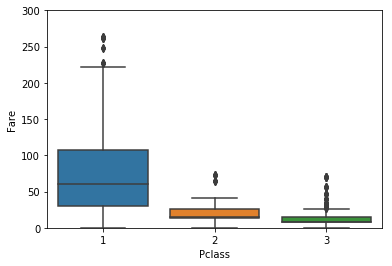

In [64]:
# use boxplot to visualize the distribution of Fare for each Pclass
sns.boxplot('Pclass','Fare',data=df)
plt.ylim(0, 300) # ignore one data point with Fare > 500
plt.show(block=False)

In [65]:
df.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Master',
       'Miss', 'Mr', 'Mrs', 'Others', 'Family'], dtype=object)

In [66]:
df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=0).mean()



,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [67]:
df[['Pclass', 'Fare']].groupby(['Pclass']).std() / df[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,0.919302
2,0.642476
3,0.864050


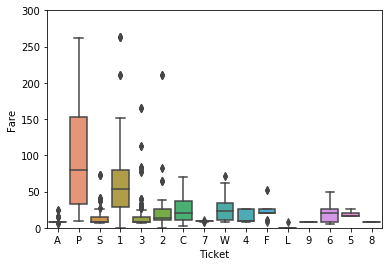

In [74]:
sns.boxplot('Ticket', 'Fare', data=df)
plt.ylim(0, 300)
plt.show()

In [77]:
df[['Ticket', 'Fare']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Fare
0,1,65.771211
1,2,20.235194
2,3,15.380682
3,4,16.764036
4,5,19.262500
5,6,19.153711
6,7,9.197438
7,8,8.397900
8,9,7.750000
9,A,10.189681


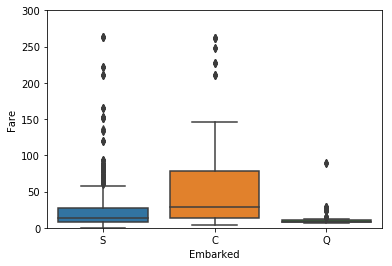

In [78]:
sns.boxplot('Embarked', 'Fare', data=df)
plt.ylim(0, 300)
plt.show(block=False)

In [79]:
df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
C,62.336267
Q,12.409012
S,27.418824


In [80]:
df[['Embarked', 'Fare']].groupby(['Embarked']).std() /  df[['Embarked', 'Fare']].groupby(['Embarked']).mean()

,Fare
Embarked,
C,1.350514
Q,1.097278
S,1.352954


In [81]:
guess_Fare = df.Fare.loc[(df.Ticket == '3') & (df.Pclass == 3) & (df.Embarked == 'S')].median()
df.Fare.fillna(guess_Fare, inplace=True)
df[['Fare', 'Survived']].groupby(['Survived'], as_index=False).mean()

,Survived,Fare
0,0.0,22.117887
1,1.0,48.395408


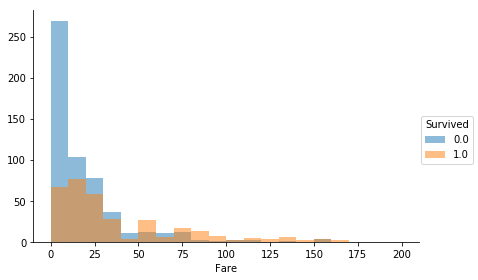

In [86]:
grid = sns.FacetGrid(df, hue='Survived', size=4, aspect=1.5)
grid.map(plt.hist, 'Fare', alpha=.5, bins=range(0, 210, 10))
grid.add_legend()
plt.show(block=False)

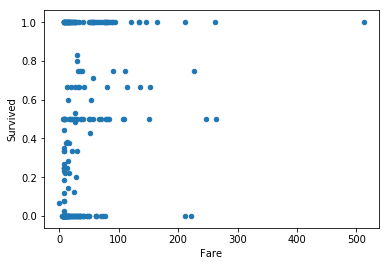

In [92]:
df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().plot.scatter('Fare', 'Survived')
plt.show(block=False)

In [97]:
df['Fare-bin'] = pd.qcut(df.Fare, 5, labels=[1,2,3,4,5]).astype(int)

df[['Fare-bin', 'Survived']].groupby('Fare-bin').mean()

,Survived
Fare-bin,
1,0.217877
2,0.201087
3,0.426901
4,0.443243
5,0.645349


In [99]:
df.Cabin.isnull().sum(axis=0)

1014

In [100]:
df = df.drop(labels=['Cabin'], axis=1)

In [101]:
df.Embarked.isnull().sum(axis=0)

2

In [102]:
df.describe(include=['O'])

,Embarked,Ticket,Title
count,1307,1309,1309
unique,3,16,5
top,S,3,Mr
freq,914,429,757


In [103]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Master,Miss,Mr,Mrs,Others,Family,Fare-bin
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.276193,0.385027,655.000000,2.294882,0.355997,0.498854,0.383838,0.046600,0.200153,0.578304,0.153552,0.021390,1.458365,2.983193
std,14.413493,51.743584,0.865560,378.020061,0.837836,0.478997,1.041658,0.486592,0.210862,0.400267,0.494019,0.360657,0.144737,0.902333,1.424885
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,4.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000


In [104]:
df.Embarked.fillna('S', inplace=True)

In [105]:
df[['Embarked', 'Survived','Pclass','Fare', 'Age', 'Sex']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived,Pclass,Fare,Age,Sex
0,C,0.553571,1.851852,62.336267,32.332170,0.418519
1,Q,0.389610,2.894309,12.409012,28.630000,0.487805
2,S,0.339009,2.344978,27.512485,29.298151,0.319869


In [106]:
df = df.drop(labels='Embarked', axis=1)

In [107]:
df.head()


,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Master,Miss,Mr,Mrs,Others,Family,Fare-bin
0,22.0,7.2500,0,1,3,0,1,0.0,A,Mr,0,0,1,0,0,2,1
1,38.0,71.2833,0,2,1,1,1,1.0,P,Mrs,0,0,0,1,0,2,5
2,26.0,7.9250,0,3,3,1,0,1.0,S,Miss,0,1,0,0,0,1,2
3,35.0,53.1000,0,4,1,1,1,1.0,1,Mrs,0,0,0,1,0,2,5
4,35.0,8.0500,0,5,3,0,0,0.0,3,Mr,0,0,1,0,0,1,2


In [108]:
df.head(10)

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Master,Miss,Mr,Mrs,Others,Family,Fare-bin
0,22.0,7.2500,0,1,3,0,1,0.0,A,Mr,0,0,1,0,0,2,1
1,38.0,71.2833,0,2,1,1,1,1.0,P,Mrs,0,0,0,1,0,2,5
2,26.0,7.9250,0,3,3,1,0,1.0,S,Miss,0,1,0,0,0,1,2
3,35.0,53.1000,0,4,1,1,1,1.0,1,Mrs,0,0,0,1,0,2,5
4,35.0,8.0500,0,5,3,0,0,0.0,3,Mr,0,0,1,0,0,1,2
5,NaN,8.4583,0,6,3,0,0,0.0,3,Mr,0,0,1,0,0,1,2
6,54.0,51.8625,0,7,1,0,0,0.0,1,Mr,0,0,1,0,0,1,5
7,2.0,21.0750,1,8,3,0,3,0.0,3,Master,1,0,0,0,0,0,3
8,27.0,11.1333,2,9,3,1,0,1.0,3,Mrs,0,0,0,1,0,3,3
9,14.0,30.0708,0,10,2,1,1,1.0,2,Mrs,0,0,0,1,0,2,4


In [109]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Master,Miss,Mr,Mrs,Others,Family,Fare-bin
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.276193,0.385027,655.000000,2.294882,0.355997,0.498854,0.383838,0.046600,0.200153,0.578304,0.153552,0.021390,1.458365,2.983193
std,14.413493,51.743584,0.865560,378.020061,0.837836,0.478997,1.041658,0.486592,0.210862,0.400267,0.494019,0.360657,0.144737,0.902333,1.424885
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,4.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Age            1046 non-null float64
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Master         1309 non-null uint8
Miss           1309 non-null uint8
Mr             1309 non-null uint8
Mrs            1309 non-null uint8
Others         1309 non-null uint8
Family         1309 non-null int64
Fare-bin       1309 non-null int64
dtypes: float64(3), int64(7), object(2), uint8(5)
memory usage: 129.2+ KB


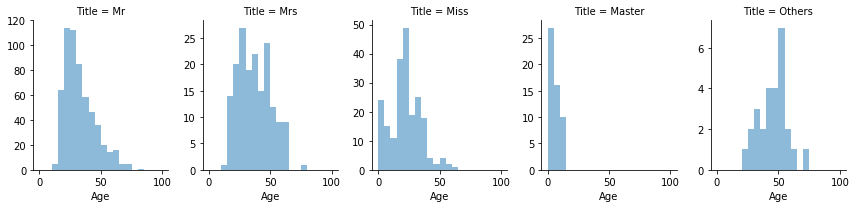

In [111]:
grid = sns.FacetGrid(df, col='Title', size=3, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show(block=False)

In [112]:
df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()
df[['Title', 'Age']].groupby(['Title']).std()

,Age
Title,
Master,4.161554
Miss,12.192794
Mr,12.422089
Mrs,12.872625
Others,11.303253


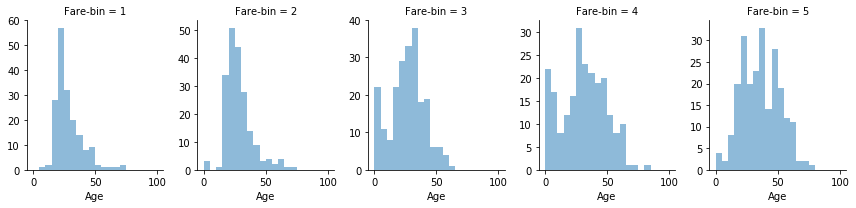

In [113]:
# visualize the correlation between Fare-bin and Age
grid = sns.FacetGrid(df, col='Fare-bin', size=3, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show(block=False)

In [114]:
# notice that instead of using Title, we should use its corresponding dummy variables 
df_sub = df[['Age','Master','Miss','Mr','Mrs','Others','Fare-bin','SibSp']]

In [115]:
df_sub

,Age,Master,Miss,Mr,Mrs,Others,Fare-bin,SibSp
0,22.0,0,0,1,0,0,1,1
1,38.0,0,0,0,1,0,5,1
2,26.0,0,1,0,0,0,2,0
3,35.0,0,0,0,1,0,5,1
4,35.0,0,0,1,0,0,2,0
5,NaN,0,0,1,0,0,2,0
6,54.0,0,0,1,0,0,5,0
7,2.0,1,0,0,0,0,3,3
8,27.0,0,0,0,1,0,3,0
9,14.0,0,0,0,1,0,4,1


In [116]:
df.columns.values

array(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket', 'Title', 'Master', 'Miss', 'Mr', 'Mrs',
       'Others', 'Family', 'Fare-bin'], dtype=object)

In [117]:
X_train = df_sub.dropna().drop('Age', axis=1)
y_train = df['Age'].dropna()
X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)

In [118]:
X_test

,Master,Miss,Mr,Mrs,Others,Fare-bin,SibSp
5,0,0,1,0,0,2,0
17,0,0,1,0,0,3,0
19,0,0,0,1,0,1,0
26,0,0,1,0,0,1,0
28,0,1,0,0,0,2,0
29,0,0,1,0,0,2,0
31,0,0,0,1,0,5,1
32,0,1,0,0,0,1,0
36,0,0,1,0,0,1,0
42,0,0,1,0,0,2,0


In [119]:
X_train

,Master,Miss,Mr,Mrs,Others,Fare-bin,SibSp
0,0,0,1,0,0,1,1
1,0,0,0,1,0,5,1
2,0,1,0,0,0,2,0
3,0,0,0,1,0,5,1
4,0,0,1,0,0,2,0
6,0,0,1,0,0,5,0
7,1,0,0,0,0,3,3
8,0,0,0,1,0,3,0
9,0,0,0,1,0,4,1
10,0,1,0,0,0,3,1


In [120]:
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test), 1)
df.Age.loc[df.Age.isnull()] = y_pred

df.Age.isnull().sum(axis=0)

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [121]:
bins = [0, 4, 12, 18, 30, 50, 65, 100]
age_index = (1,2,3,4,5,6,7)
df['Age-bin'] = pd.cut(df.Age, bins, labels=age_index).astype(int)

df[['Age-bin', 'Survived']].groupby(['Age-bin'], as_index=False).mean()

,Age-bin,Survived
0,1,0.675000
1,2,0.463415
2,3,0.397436
3,4,0.315789
4,5,0.427083
5,6,0.375000
6,7,0.125000


In [122]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

In [123]:
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [124]:
df.Ticket

0       4
1       P
2       S
3       1
4       3
5       3
6       1
7       3
8       3
9       2
10      P
11      1
12      4
13      3
14      3
15      2
16      3
17      2
18      3
19      2
20      2
21      2
22      3
23      1
24      3
25      3
26      2
27      1
28      3
29      3
       ..
1279    3
1280    3
1281    1
1282    P
1283    C
1284    C
1285    3
1286    1
1287    3
1288    1
1289    3
1290    2
1291    3
1292    2
1293    1
1294    1
1295    1
1296    S
1297    2
1298    1
1299    3
1300    S
1301    3
1302    1
1303    3
1304    4
1305    P
1306    S
1307    3
1308    2
Name: Ticket, Length: 1309, dtype: object

In [125]:
df = pd.get_dummies(df,columns=['Ticket'])

In [126]:
df.columns.values

array(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Title', 'Master', 'Miss', 'Mr', 'Mrs', 'Others',
       'Family', 'Fare-bin', 'Age-bin', 'Ticket_1', 'Ticket_2', 'Ticket_3',
       'Ticket_4', 'Ticket_C', 'Ticket_P', 'Ticket_S'], dtype=object)

In [127]:
df = df.drop(labels=['SibSp','Parch','Age','Fare','Title'], axis=1)
y_train = df[0:891]['Survived'].values
X_train = df[0:891].drop(['Survived','PassengerId'], axis=1).values
X_test  = df[891:].drop(['Survived','PassengerId'], axis=1).values

In [134]:
# Initialising the ANN
model = Sequential()

# layers
# model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
# model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
# model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200


 32/891 [>.............................] - ETA: 10s - loss: 0.6937 - acc: 0.3438

544/891 [=================>............] - ETA: 0s - loss: 0.6906 - acc: 0.6140 

891/891 [==============================] - 0s - loss: 0.6894 - acc: 0.6072     


Epoch 2/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6810 - acc: 0.6562

544/891 [=================>............] - ETA: 0s - loss: 0.6813 - acc: 0.6066

891/891 [==============================] - 0s - loss: 0.6776 - acc: 0.6162     


Epoch 3/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6971 - acc: 0.4688

544/891 [=================>............] - ETA: 0s - loss: 0.6744 - acc: 0.5772

891/891 [==============================] - 0s - loss: 0.6616 - acc: 0.6162     


Epoch 4/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6506 - acc: 0.6562

576/891 [==================>...........] - ETA: 0s - loss: 0.6506 - acc: 0.6111

891/891 [==============================] - 0s - loss: 0.6435 - acc: 0.6162     


Epoch 5/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6559 - acc: 0.5625

576/891 [==================>...........] - ETA: 0s - loss: 0.6237 - acc: 0.6181

891/891 [==============================] - 0s - loss: 0.6197 - acc: 0.6162     


Epoch 6/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6675 - acc: 0.4688

480/891 [===============>..............] - ETA: 0s - loss: 0.6119 - acc: 0.5958

891/891 [==============================] - 0s - loss: 0.5916 - acc: 0.6162     


Epoch 7/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5633 - acc: 0.5938

480/891 [===============>..............] - ETA: 0s - loss: 0.5509 - acc: 0.6625

891/891 [==============================] - 0s - loss: 0.5628 - acc: 0.6790     


Epoch 8/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5076 - acc: 0.7500

512/891 [================>.............] - ETA: 0s - loss: 0.5334 - acc: 0.7734

891/891 [==============================] - 0s - loss: 0.5360 - acc: 0.7666     


Epoch 9/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5269 - acc: 0.7500

672/891 [=====================>........] - ETA: 0s - loss: 0.5198 - acc: 0.7798



891/891 [==============================] - 0s - loss: 0.5102 - acc: 0.7890     


Epoch 10/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5139 - acc: 0.8125

448/891 [==============>...............] - ETA: 0s - loss: 0.5051 - acc: 0.8080



891/891 [==============================] - 0s - loss: 0.4885 - acc: 0.8103     


Epoch 11/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4882 - acc: 0.8125

352/891 [==========>...................] - ETA: 0s - loss: 0.4662 - acc: 0.8097

768/891 [========================>.....] - ETA: 0s - loss: 0.4657 - acc: 0.8125

891/891 [==============================] - 0s - loss: 0.4715 - acc: 0.8114     


Epoch 12/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3674 - acc: 0.8750

480/891 [===============>..............] - ETA: 0s - loss: 0.4703 - acc: 0.7958

891/891 [==============================] - 0s - loss: 0.4581 - acc: 0.8126     


Epoch 13/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3226 - acc: 0.9062

480/891 [===============>..............] - ETA: 0s - loss: 0.4391 - acc: 0.8229

891/891 [==============================] - 0s - loss: 0.4488 - acc: 0.8193     


Epoch 14/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4555 - acc: 0.7500

480/891 [===============>..............] - ETA: 0s - loss: 0.4338 - acc: 0.8187

891/891 [==============================] - 0s - loss: 0.4428 - acc: 0.8137     


Epoch 15/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3468 - acc: 0.9062

416/891 [=============>................] - ETA: 0s - loss: 0.4024 - acc: 0.8341

891/891 [==============================] - 0s - loss: 0.4379 - acc: 0.8193     


Epoch 16/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4026 - acc: 0.8438

352/891 [==========>...................] - ETA: 0s - loss: 0.4359 - acc: 0.8267

891/891 [==============================] - 0s - loss: 0.4335 - acc: 0.8204     


Epoch 17/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4197 - acc: 0.8438

384/891 [===========>..................] - ETA: 0s - loss: 0.4542 - acc: 0.8073

864/891 [============================>.] - ETA: 0s - loss: 0.4283 - acc: 0.8171

891/891 [==============================] - 0s - loss: 0.4304 - acc: 0.8193     


Epoch 18/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4145 - acc: 0.8125

448/891 [==============>...............] - ETA: 0s - loss: 0.4166 - acc: 0.8281

891/891 [==============================] - 0s - loss: 0.4299 - acc: 0.8204     


Epoch 19/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4698 - acc: 0.7812

512/891 [================>.............] - ETA: 0s - loss: 0.4442 - acc: 0.8066

891/891 [==============================] - 0s - loss: 0.4294 - acc: 0.8249     


Epoch 20/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3957 - acc: 0.8125



256/891 [=======>......................] - ETA: 0s - loss: 0.3778 - acc: 0.8438

704/891 [======================>.......] - ETA: 0s - loss: 0.4137 - acc: 0.8324

891/891 [==============================] - 0s - loss: 0.4270 - acc: 0.8215     


Epoch 21/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4904 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.4379 - acc: 0.8143

891/891 [==============================] - 0s - loss: 0.4248 - acc: 0.8260     


Epoch 22/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3894 - acc: 0.7500

192/891 [=====>........................] - ETA: 0s - loss: 0.3948 - acc: 0.8333

832/891 [===========================>..] - ETA: 0s - loss: 0.4278 - acc: 0.8233

891/891 [==============================] - 0s - loss: 0.4251 - acc: 0.8215     


Epoch 23/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4788 - acc: 0.8125

480/891 [===============>..............] - ETA: 0s - loss: 0.4438 - acc: 0.8229

891/891 [==============================] - 0s - loss: 0.4240 - acc: 0.8339     


Epoch 24/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3403 - acc: 0.8438

416/891 [=============>................] - ETA: 0s - loss: 0.4248 - acc: 0.8341

891/891 [==============================] - 0s - loss: 0.4220 - acc: 0.8272     


Epoch 25/200


 32/891 [>.............................] - ETA: 0s - loss: 0.4887 - acc: 0.7188

448/891 [==============>...............] - ETA: 0s - loss: 0.4359 - acc: 0.8192



891/891 [==============================] - 0s - loss: 0.4224 - acc: 0.8316     


Epoch 26/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2162 - acc: 0.9688



480/891 [===============>..............] - ETA: 0s - loss: 0.4042 - acc: 0.8313

891/891 [==============================] - 0s - loss: 0.4204 - acc: 0.8249     


Epoch 27/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3560 - acc: 0.8750

480/891 [===============>..............] - ETA: 0s - loss: 0.4290 - acc: 0.8250



891/891 [==============================] - 0s - loss: 0.4200 - acc: 0.8339     


Epoch 28/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3508 - acc: 0.9062



512/891 [================>.............]

 - ETA: 0s - loss: 0.4258 - acc: 0.8340

891/891 [==============================] - 0s - loss: 0.4189 - acc: 0.8384     


Epoch 29/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3018 - acc: 0.9062

480/891 [===============>..............] - ETA: 0s - loss: 0.4229 - acc: 0.8313

891/891 [==============================] - 0s - loss: 0.4189 - acc: 0.8305     


Epoch 30/200


 32/891 [>.............................] - ETA: 0s - loss: 0.2462 - acc: 0.8750

480/891 [===============>..............] - ETA: 0s - loss: 0.4036 - acc: 0.8333

891/891 [==============================] - 0s - loss: 0.4181 - acc: 0.8272     


Epoch 31/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5790 - acc: 0.7188

480/891 [===============>..............] - ETA: 0s - loss: 0.4321 - acc: 0.8250

891/891 [==============================] - 0s - loss: 0.4178 - acc: 0.8384     


Epoch 32/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4751 - acc: 0.8750

480/891 [===============>..............] - ETA: 0s - loss: 0.4006 - acc: 0.8396

891/891 [==============================] - 0s - loss: 0.4172 - acc: 0.8406     


Epoch 33/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5314 - acc: 0.8438

576/891 [==================>...........] - ETA: 0s - loss: 0.4197 - acc: 0.8455

891/891 [==============================] - 0s - loss: 0.4177 - acc: 0.8384     


Epoch 34/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2852 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.4455 - acc: 0.8199

891/891 [==============================] - 0s - loss: 0.4164 - acc: 0.8384     


Epoch 35/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6186 - acc: 0.8125

384/891 [===========>..................] - ETA: 0s - loss: 0.4171 - acc: 0.8516

800/891 [=========================>....] - ETA: 0s - loss: 0.4163 - acc: 0.8413

891/891 [==============================] - 0s - loss: 0.4162 - acc: 0.8384     


Epoch 36/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4319 - acc: 0.7500

352/891 [==========>...................] - ETA: 0s - loss: 0.4139 - acc: 0.8295

832/891 [===========================>..] - ETA: 0s - loss: 0.4086 - acc: 0.8401

891/891 [==============================] - 0s - loss: 0.4157 - acc: 0.8350     


Epoch 37/200
 32/891 [>.............................]

 - ETA: 0s - loss: 0.3926 - acc: 0.8438

352/891 [==========>...................] - ETA: 0s - loss: 0.4155 - acc: 0.8438

832/891 [===========================>..] - ETA: 0s - loss: 0.4173 - acc: 0.8341

891/891 [==============================] - 0s - loss: 0.4154 - acc: 0.8373     


Epoch 38/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6376 - acc: 0.7500

352/891 [==========>...................] - ETA: 0s - loss: 0.4353 - acc: 0.8239

891/891 [==============================] - 0s - loss: 0.4149 - acc: 0.8373     


Epoch 39/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4859 - acc: 0.7812

512/891 [================>.............] - ETA: 0s - loss: 0.4240 - acc: 0.8301

891/891 [==============================] - 0s - loss: 0.4150 - acc: 0.8361     


Epoch 40/200


 32/891 [>.............................] - ETA: 0s - loss: 0.4795 - acc: 0.7812

480/891 [===============>..............] - ETA: 0s - loss: 0.4307 - acc: 0.8333

891/891 [==============================] - 0s - loss: 0.4153 - acc: 0.8361     


Epoch 41/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3402 - acc: 0.9062

576/891 [==================>...........] - ETA: 0s - loss: 0.4328 - acc: 0.8299

891/891 [==============================] - 0s - loss: 0.4141 - acc: 0.8373     


Epoch 42/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4609 - acc: 0.8125

480/891 [===============>..............] - ETA: 0s - loss: 0.4165 - acc: 0.8417

891/891 [==============================] - 0s - loss: 0.4148 - acc: 0.8350     


Epoch 43/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2781 - acc: 0.8750

480/891 [===============>..............] - ETA: 0s - loss: 0.3870 - acc: 0.8479

891/891 [==============================] - 0s - loss: 0.4138 - acc: 0.8373     


Epoch 44/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2948 - acc: 0.9062

448/891 [==============>...............] - ETA: 0s - loss: 0.3961 - acc: 0.8326

891/891 [==============================] - 0s - loss: 0.4132 - acc: 0.8350     


Epoch 45/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6427 - acc: 0.7188

512/891 [================>.............] - ETA: 0s - loss: 0.4070 - acc: 0.8418

891/891 [==============================] - 0s - loss: 0.4136 - acc: 0.8339     


Epoch 46/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4772 - acc: 0.8438

512/891 [================>.............] - ETA: 0s - loss: 0.4091 - acc: 0.8340

891/891 [==============================] - 0s - loss: 0.4137 - acc: 0.8339     


Epoch 47/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2032 - acc: 0.9062

576/891 [==================>...........] - ETA: 0s - loss: 0.4102 - acc: 0.8438

891/891 [==============================] - 0s - loss: 0.4141 - acc: 0.8406     


Epoch 48/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3532 - acc: 0.8750

576/891 [==================>...........] - ETA: 0s - loss: 0.4379 - acc: 0.8316



891/891 [==============================] - 0s - loss: 0.4138 - acc: 0.8350     


Epoch 49/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3636 - acc: 0.8750

512/891 [================>.............] - ETA: 0s - loss: 0.4040 - acc: 0.8535

891/891 [==============================] - 0s - loss: 0.4125 - acc: 0.8339     


Epoch 50/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4719 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.4147 - acc: 0.8438

891/891 [==============================] - 0s - loss: 0.4124 - acc: 0.8339     


Epoch 51/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5559 - acc: 0.7188

512/891 [================>.............] - ETA: 0s - loss: 0.4001 - acc: 0.8301

891/891 [==============================] - 0s - loss: 0.4121 - acc: 0.8350     


Epoch 52/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3644 - acc: 0.8438

512/891 [================>.............] - ETA: 0s - loss: 0.4013 - acc: 0.8438

891/891 [==============================] - 0s - loss: 0.4129 - acc: 0.8328     


Epoch 53/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4571 - acc: 0.7812

416/891 [=============>................] - ETA: 0s - loss: 0.4222 - acc: 0.8341

891/891 [==============================] - 0s - loss: 0.4126 - acc: 0.8339     


Epoch 54/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5980 - acc: 0.7500

704/891 [======================>.......] - ETA: 0s - loss: 0.4116 - acc: 0.8366

891/891 [==============================] - 0s - loss: 0.4120 - acc: 0.8373     


Epoch 55/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3770 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.4258 - acc: 0.8309

891/891 [==============================] - 0s - loss: 0.4117 - acc: 0.8350     


Epoch 56/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2724 - acc: 0.8750

480/891 [===============>..............] - ETA: 0s - loss: 0.3994 - acc: 0.8375

891/891 [==============================] - 0s - loss: 0.4120 - acc: 0.8350     


Epoch 57/200


 32/891 [>.............................]

 - ETA: 0s - loss: 0.4689 - acc: 0.8125

448/891 [==============>...............] - ETA: 0s - loss: 0.4428 - acc: 0.8125

891/891 [==============================] - 0s - loss: 0.4114 - acc: 0.8328     


Epoch 58/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2654 - acc: 0.9375

544/891 [=================>............] - ETA: 0s - loss: 0.4041 - acc: 0.8272

891/891 [==============================] - 0s - loss: 0.4115 - acc: 0.8328     


Epoch 59/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2517 - acc: 0.9375

608/891 [===================>..........] - ETA: 0s - loss: 0.3888 - acc: 0.8470

891/891 [==============================] - 0s - loss: 0.4113 - acc: 0.8361     


Epoch 60/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4095 - acc: 0.8125

480/891 [===============>..............] - ETA: 0s - loss: 0.4190 - acc: 0.8250

891/891 [==============================] - 0s - loss: 0.4114 - acc: 0.8339     


Epoch 61/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6304 - acc: 0.7188

512/891 [================>.............] - ETA: 0s - loss: 0.3917 - acc: 0.8418

891/891 [==============================] - 0s - loss: 0.4110 - acc: 0.8339     


Epoch 62/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3796 - acc: 0.8438

512/891 [================>.............] - ETA: 0s - loss: 0.4009 - acc: 0.8262

891/891 [==============================] - 0s - loss: 0.4111 - acc: 0.8316     


Epoch 63/200
 32/891 [>.............................] - ETA: 0s - loss: 0.1933 - acc: 0.9688

544/891 [=================>............] - ETA: 0s - loss: 0.4268 - acc: 0.8199

891/891 [==============================] - 0s - loss: 0.4110 - acc: 0.8339     


Epoch 64/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3320 - acc: 0.8438

576/891 [==================>...........] - ETA: 0s - loss: 0.3988 - acc: 0.8333



891/891 [==============================] - 0s - loss: 0.4110 - acc: 0.8339     


Epoch 65/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2383 - acc: 0.9375

544/891 [=================>............] - ETA: 0s - loss: 0.3985 - acc: 0.8456

891/891 [==============================] - 0s - loss: 0.4109 - acc: 0.8339     


Epoch 66/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4056 - acc: 0.8750

576/891 [==================>...........] - ETA: 0s - loss: 0.3769 - acc: 0.8455

891/891 [==============================] - 0s - loss: 0.4108 - acc: 0.8305     


Epoch 67/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3980 - acc: 0.8125

576/891 [==================>...........] - ETA: 0s - loss: 0.4040 - acc: 0.8316



891/891 [==============================] - 0s - loss: 0.4116 - acc: 0.8283     


Epoch 68/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4185 - acc: 0.8125

576/891 [==================>...........] - ETA: 0s - loss: 0.4185 - acc: 0.8351

891/891 [==============================] - 0s - loss: 0.4115 - acc: 0.8294     


Epoch 69/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4376 - acc: 0.8438

512/891 [================>.............] - ETA: 0s - loss: 0.4048 - acc: 0.8379

891/891 [==============================] - 0s - loss: 0.4107 - acc: 0.8283     


Epoch 70/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3037 - acc: 0.9062

544/891 [=================>............] - ETA: 0s - loss: 0.4091 - acc: 0.8327

891/891 [==============================] - 0s - loss: 0.4115 - acc: 0.8305     


Epoch 71/200


 32/891 [>.............................] - ETA: 0s - loss: 0.4973 - acc: 0.9062

512/891 [================>.............] - ETA: 0s - loss: 0.4015 - acc: 0.8398

891/891 [==============================] - 0s - loss: 0.4103 - acc: 0.8316     


Epoch 72/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5907 - acc: 0.7500

640/891 [====================>.........] - ETA: 0s - loss: 0.4133 - acc: 0.8313

891/891 [==============================] - 0s - loss: 0.4103 - acc: 0.8294     


Epoch 73/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4415 - acc: 0.8438

672/891 [=====================>........] - ETA: 0s - loss: 0.4140 - acc: 0.8318

891/891 [==============================] - 0s - loss: 0.4103 - acc: 0.8294     

Epoch 74/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3309 - acc: 0.8438

512/891 [================>.............] - ETA: 0s - loss: 0.4074 - acc: 0.8340



891/891 [==============================] - 0s - loss: 0.4106 - acc: 0.8328     


Epoch 75/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3908 - acc: 0.8750

608/891 [===================>..........] - ETA: 0s - loss: 0.4074 - acc: 0.8454

891/891 [==============================] - 0s - loss: 0.4098 - acc: 0.8283     


Epoch 76/200


 32/891 [>.............................] - ETA: 0s - loss: 0.3259 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.4012 - acc: 0.8272

891/891 [==============================] - 0s - loss: 0.4100 - acc: 0.8316     


Epoch 77/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2690 - acc: 0.9375

576/891 [==================>...........] - ETA: 0s - loss: 0.4152 - acc: 0.8247

891/891 [==============================] - 0s - loss: 0.4098 - acc: 0.8294     


Epoch 78/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3930 - acc: 0.9062

576/891 [==================>...........] - ETA: 0s - loss: 0.4111 - acc: 0.8333

891/891 [==============================] - 0s - loss: 0.4097 - acc: 0.8283     


Epoch 79/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2892 - acc: 0.8438

512/891 [================>.............] - ETA: 0s - loss: 0.3950 - acc: 0.8379

891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8294     


Epoch 80/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4081 - acc: 0.7500

512/891 [================>.............] - ETA: 0s - loss: 0.4105 - acc: 0.8359

891/891 [==============================] - 0s - loss: 0.4098 - acc: 0.8328     

Epoch 81/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6163 - acc: 0.6875

512/891 [================>.............] - ETA: 0s - loss: 0.4245 - acc: 0.8301

891/891 [==============================] - 0s - loss: 0.4098 - acc: 0.8294     


Epoch 82/200


 32/891 [>.............................] - ETA: 0s - loss: 0.3010 - acc: 0.8750

576/891 [==================>...........] - ETA: 0s - loss: 0.4162 - acc: 0.8299

891/891 [==============================] - 0s - loss: 0.4105 - acc: 0.8283     


Epoch 83/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5938 - acc: 0.7500

512/891 [================>.............] - ETA: 0s - loss: 0.3994 - acc: 0.8340

891/891 [==============================] - 0s - loss: 0.4099 - acc: 0.8316     


Epoch 84/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2720 - acc: 0.9062

608/891 [===================>..........] - ETA: 0s - loss: 0.4153 - acc: 0.8273

891/891 [==============================] - 0s - loss: 0.4102 - acc: 0.8294     


Epoch 85/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2666 - acc: 0.9375

544/891 [=================>............] - ETA: 0s - loss: 0.4245 - acc: 0.8217

891/891 [==============================] - 0s - loss: 0.4104 - acc: 0.8272     


Epoch 86/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2933 - acc: 0.9375

448/891 [==============>...............] - ETA: 0s - loss: 0.4333 - acc: 0.8259

891/891 [==============================] - 0s - loss: 0.4099 - acc: 0.8305     


Epoch 87/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5405 - acc: 0.7188

448/891 [==============>...............] - ETA: 0s - loss: 0.4094 - acc: 0.8259

891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8294     


Epoch 88/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5979 - acc: 0.7812

544/891 [=================>............] - ETA: 0s - loss: 0.4212 - acc: 0.8180

891/891 [==============================] - 0s - loss: 0.4098 - acc: 0.8283     


Epoch 89/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2557 - acc: 0.9375

448/891 [==============>...............] - ETA: 0s - loss: 0.3891 - acc: 0.8393

891/891 [==============================] - 0s - loss: 0.4097 - acc: 0.8305     


Epoch 90/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3194 - acc: 0.8750

576/891 [==================>...........] - ETA: 0s - loss: 0.4145 - acc: 0.8264

891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8294     


Epoch 91/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3349 - acc: 0.8438

608/891 [===================>..........] - ETA: 0s - loss: 0.3896 - acc: 0.8454

891/891 [==============================] - 0s - loss: 0.4104 - acc: 0.8305     


Epoch 92/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5693 - acc: 0.7500

544/891 [=================>............] - ETA: 0s - loss: 0.4137 - acc: 0.8290

891/891 [==============================] - 0s - loss: 0.4098 - acc: 0.8294     


Epoch 93/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2728 - acc: 0.9375

544/891 [=================>............] - ETA: 0s - loss: 0.3916 - acc: 0.8272

891/891 [==============================] - 0s - loss: 0.4104 - acc: 0.8272     


Epoch 94/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3836 - acc: 0.8438

640/891 [====================>.........] - ETA: 0s - loss: 0.4170 - acc: 0.8297

891/891 [==============================] - 0s - loss: 0.4099 - acc: 0.8294     


Epoch 95/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4408 - acc: 0.7500

608/891 [===================>..........] - ETA: 0s - loss: 0.4119 - acc: 0.8273

891/891 [==============================] - 0s - loss: 0.4103 - acc: 0.8305     


Epoch 96/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3915 - acc: 0.8125

672/891 [=====================>........] - ETA: 0s - loss: 0.4082 - acc: 0.8244

891/891 [==============================] - 0s - loss: 0.4106 - acc: 0.8283     


Epoch 97/200


 32/891 [>.............................] - ETA: 0s - loss: 0.3535 - acc: 0.9062

544/891 [=================>............] - ETA: 0s - loss: 0.4257 - acc: 0.8272

891/891 [==============================] - 0s - loss: 0.4100 - acc: 0.8305     


Epoch 98/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5050 - acc: 0.7500

576/891 [==================>...........] - ETA: 0s - loss: 0.4025 - acc: 0.8351

891/891 [==============================] - 0s - loss: 0.4094 - acc: 0.8305     


Epoch 99/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4075 - acc: 0.8438

576/891 [==================>...........] - ETA: 0s - loss: 0.3663 - acc: 0.8438

891/891 [==============================] - 0s - loss: 0.4097 - acc: 0.8294     


Epoch 100/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4373 - acc: 0.7812

576/891 [==================>...........] - ETA: 0s - loss: 0.4156 - acc: 0.8264

891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8316     


Epoch 101/200


 32/891 [>.............................] - ETA: 0s - loss: 0.3561 - acc: 0.9062

608/891 [===================>..........] - ETA: 0s - loss: 0.4089 - acc: 0.8273

891/891 [==============================] - 0s - loss: 0.4093 - acc: 0.8272     


Epoch 102/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5893 - acc: 0.7812

640/891 [====================>.........] - ETA: 0s - loss: 0.4235 - acc: 0.8219



891/891 [==============================] - 0s - loss: 0.4097 - acc: 0.8294     


Epoch 103/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4519 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.3981 - acc: 0.8364

891/891 [==============================] - 0s - loss: 0.4094 - acc: 0.8316     


Epoch 104/200


 32/891 [>.............................] - ETA: 0s - loss: 0.2400 - acc: 0.9375

608/891 [===================>..........] - ETA: 0s - loss: 0.4100 - acc: 0.8322

891/891 [==============================] - 0s - loss: 0.4094 - acc: 0.8294     


Epoch 105/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4413 - acc: 0.7812



576/891 [==================>...........] - ETA: 0s - loss: 0.4148 - acc: 0.8281

891/891 [==============================] - 0s - loss: 0.4099 - acc: 0.8283     


Epoch 106/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4099 - acc: 0.8438

416/891 [=============>................] - ETA: 0s - loss: 0.4148 - acc: 0.8341

891/891 [==============================] - 0s - loss: 0.4092 - acc: 0.8294     


Epoch 107/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2597 - acc: 0.9688



544/891 [=================>............] - ETA: 0s - loss: 0.4007 - acc: 0.8382



891/891 [==============================] - 0s - loss: 0.4095 - acc: 0.8272     


Epoch 108/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4982 - acc: 0.7500

640/891 [====================>.........] - ETA: 0s - loss: 0.4030 - acc: 0.8313

891/891 [==============================] - 0s - loss: 0.4097 - acc: 0.8305     


Epoch 109/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2976 - acc: 0.9062

672/891 [=====================>........] - ETA: 0s - loss: 0.4217 - acc: 0.8229

891/891 [==============================] - 0s - loss: 0.4100 - acc: 0.8283     


Epoch 110/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5502 - acc: 0.7500

544/891 [=================>............] - ETA: 0s - loss: 0.3992 - acc: 0.8364

891/891 [==============================] - 0s - loss: 0.4092 - acc: 0.8305     


Epoch 111/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4685 - acc: 0.7500

672/891 [=====================>........] - ETA: 0s - loss: 0.4249 - acc: 0.8185

891/891 [==============================] - 0s - loss: 0.4094 - acc: 0.8283     


Epoch 112/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4922 - acc: 0.7812

544/891 [=================>............] - ETA: 0s - loss: 0.4042 - acc: 0.8309

891/891 [==============================] - 0s - loss: 0.4093 - acc: 0.8350     


Epoch 113/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3561 - acc: 0.8438

608/891 [===================>..........] - ETA: 0s - loss: 0.4463 - acc: 0.8109

891/891 [==============================] - 0s - loss: 0.4111 - acc: 0.8294     


Epoch 114/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4170 - acc: 0.8438

608/891 [===================>..........] - ETA: 0s - loss: 0.4152 - acc: 0.8306

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8283     


Epoch 115/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3580 - acc: 0.8125

891/891 [==============================] - 0s - loss: 0.4092 - acc: 0.8272     


Epoch 116/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4425 - acc: 0.8438

672/891 [=====================>........] - ETA: 0s - loss: 0.4107 - acc: 0.8244

891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8305     


Epoch 117/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5585 - acc: 0.7188



704/891 [======================>.......] - ETA: 0s - loss: 0.4156 - acc: 0.8239

891/891 [==============================] - 0s - loss: 0.4104 - acc: 0.8328     


Epoch 118/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3174 - acc: 0.8438

640/891 [====================>.........] - ETA: 0s - loss: 0.4178 - acc: 0.8250

891/891 [==============================] - 0s - loss: 0.4091 - acc: 0.8283     


Epoch 119/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2810 - acc: 0.9062

672/891 [=====================>........] - ETA: 0s - loss: 0.4100 - acc: 0.8304

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8305     


Epoch 120/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3572 - acc: 0.8438

576/891 [==================>...........] - ETA: 0s - loss: 0.4545 - acc: 0.8056

891/891 [==============================] - 0s - loss: 0.4097 - acc: 0.8294     


Epoch 121/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4058 - acc: 0.8125

512/891 [================>.............] - ETA: 0s - loss: 0.4318 - acc: 0.8164

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8294     


Epoch 122/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3562 - acc: 0.7812

544/891 [=================>............] - ETA: 0s - loss: 0.4235 - acc: 0.8107

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8305     


Epoch 123/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2610 - acc: 0.9375

640/891 [====================>.........] - ETA: 0s - loss: 0.4019 - acc: 0.8281

891/891 [==============================] - 0s - loss: 0.4093 - acc: 0.8283     


Epoch 124/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3970 - acc: 0.8125

736/891 [=======================>......] - ETA: 0s - loss: 0.4142 - acc: 0.8288

891/891 [==============================] - 0s - loss: 0.4094 - acc: 0.8294     


Epoch 125/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5286 - acc: 0.6250

480/891 [===============>..............] - ETA: 0s - loss: 0.3751 - acc: 0.8417

891/891 [==============================] - 0s - loss: 0.4102 - acc: 0.8272     


Epoch 126/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5274 - acc: 0.7500

576/891 [==================>...........] - ETA: 0s - loss: 0.4126 - acc: 0.8229

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8294     


Epoch 127/200


 32/891 [>.............................] - ETA: 0s - loss: 0.3449 - acc: 0.9062

672/891 [=====================>........] - ETA: 0s - loss: 0.4032 - acc: 0.8333

891/891 [==============================] - 0s - loss: 0.4092 - acc: 0.8316     


Epoch 128/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2494 - acc: 0.8750

544/891 [=================>............] - ETA: 0s - loss: 0.4108 - acc: 0.8254

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8294     


Epoch 129/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2769 - acc: 0.8750

608/891 [===================>..........] - ETA: 0s - loss: 0.3945 - acc: 0.8438

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8316     


Epoch 130/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5397 - acc: 0.7500

736/891 [=======================>......] - ETA: 0s - loss: 0.4107 - acc: 0.8302



891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8294     


Epoch 131/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3043 - acc: 0.8750

480/891 [===============>..............] - ETA: 0s - loss: 0.3845 - acc: 0.8354

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8305     


Epoch 132/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4070 - acc: 0.9062

576/891 [==================>...........] - ETA: 0s - loss: 0.4105 - acc: 0.8368

891/891 [==============================]

 - 0s - loss: 0.4091 - acc: 0.8294     


Epoch 133/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3588 - acc: 0.8750

576/891 [==================>...........] - ETA: 0s - loss: 0.4071 - acc: 0.8333

891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8272     


Epoch 134/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3452 - acc: 0.8750

640/891 [====================>.........] - ETA: 0s - loss: 0.3902 - acc: 0.8391

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8305     


Epoch 135/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3121 - acc: 0.8438

576/891 [==================>...........] - ETA: 0s - loss: 0.4054 - acc: 0.8229

891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8283     

Epoch 136/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5416 - acc: 0.8125

480/891 [===============>..............] - ETA: 0s - loss: 0.4223 - acc: 0.8313

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8283     


Epoch 137/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2468 - acc: 0.9062

576/891 [==================>...........] - ETA: 0s - loss: 0.4026 - acc: 0.8194

891/891 [==============================] - 0s - loss: 0.4091 - acc: 0.8260     


Epoch 138/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5714 - acc: 0.7812

512/891 [================>.............] - ETA: 0s - loss: 0.3960 - acc: 0.8359

891/891 [==============================] - 0s - loss: 0.4094 - acc: 0.8294     


Epoch 139/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4222 - acc: 0.7500

512/891 [================>.............] - ETA: 0s - loss: 0.4052 - acc: 0.8340

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8272     


Epoch 140/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4596 - acc: 0.8125

576/891 [==================>...........] - ETA: 0s - loss: 0.4098 - acc: 0.8264

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8272     


Epoch 141/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4171 - acc: 0.8125

640/891 [====================>.........] - ETA: 0s - loss: 0.4099 - acc: 0.8266

891/891 [==============================] - 0s - loss: 0.4095 - acc: 0.8294     


Epoch 142/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3847 - acc: 0.8125

576/891 [==================>...........] - ETA: 0s - loss: 0.4111 - acc: 0.8281

891/891 [==============================] - 0s - loss: 0.4097 - acc: 0.8272     


Epoch 143/200


 32/891 [>.............................] - ETA: 0s - loss: 0.2374 - acc: 0.9688

704/891 [======================>.......] - ETA: 0s - loss: 0.4186 - acc: 0.8253

891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8305     


Epoch 144/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4258 - acc: 0.8125

640/891 [====================>.........] - ETA: 0s - loss: 0.4192 - acc: 0.8266

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8316     


Epoch 145/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4519 - acc: 0.8125

544/891 [=================>............] - ETA: 0s - loss: 0.4092 - acc: 0.8290

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8294     


Epoch 146/200


 32/891 [>.............................] - ETA: 0s - loss: 0.3789 - acc: 0.8438

672/891 [=====================>........] - ETA: 0s - loss: 0.4152 - acc: 0.8229



891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8316     


Epoch 147/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3137 - acc: 0.9375

480/891 [===============>..............] - ETA: 0s - loss: 0.3931 - acc: 0.8479

891/891 [==============================] - 0s - loss: 0.4093 - acc: 0.8294     


Epoch 148/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4525 - acc: 0.8125

576/891 [==================>...........] - ETA: 0s - loss: 0.3974 - acc: 0.8264

891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8294     


Epoch 149/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4843 - acc: 0.8125

704/891 [======================>.......] - ETA: 0s - loss: 0.4182 - acc: 0.8196



891/891 [==============================] - 0s - loss: 0.4093 - acc: 0.8305     


Epoch 150/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4071 - acc: 0.8438

576/891 [==================>...........] - ETA: 0s - loss: 0.4181 - acc: 0.8194

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8294     


Epoch 151/200


 32/891 [>.............................] - ETA: 0s - loss: 0.3186 - acc: 0.8750

576/891 [==================>...........] - ETA: 0s - loss: 0.3882 - acc: 0.8299

891/891 [==============================] - 0s - loss: 0.4098 - acc: 0.8305     


Epoch 152/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3768 - acc: 0.8125

768/891 [========================>.....] - ETA: 0s - loss: 0.4177 - acc: 0.8229

891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8272     


Epoch 153/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4404 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.4013 - acc: 0.8309

891/891 [==============================] - 0s - loss: 0.4102 - acc: 0.8283     


Epoch 154/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3657 - acc: 0.8750

512/891 [================>.............] - ETA: 0s - loss: 0.3899 - acc: 0.8398

891/891 [==============================] - 0s - loss: 0.4082 - acc: 0.8305     


Epoch 155/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2749 - acc: 0.9375

704/891 [======================>.......] - ETA: 0s - loss: 0.4094 - acc: 0.8310

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8283     


Epoch 156/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3622 - acc: 0.8750

704/891 [======================>.......] - ETA: 0s - loss: 0.4285 - acc: 0.8182

891/891 [==============================] - 0s - loss: 0.4095 - acc: 0.8294     


Epoch 157/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4339 - acc: 0.8125

576/891 [==================>...........] - ETA: 0s - loss: 0.3992 - acc: 0.8316

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8294     


Epoch 158/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3771 - acc: 0.8750

512/891 [================>.............] - ETA: 0s - loss: 0.4193 - acc: 0.8281

891/891 [==============================] - 0s - loss: 0.4091 - acc: 0.8283     


Epoch 159/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2905 - acc: 0.8750



736/891 [=======================>......] - ETA: 0s - loss: 0.4071 - acc: 0.8329

891/891 [==============================] - 0s - loss: 0.4084 - acc: 0.8305     


Epoch 160/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4028 - acc: 0.8125

576/891 [==================>...........] - ETA: 0s - loss: 0.4089 - acc: 0.8316

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8294     


Epoch 161/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3266 - acc: 0.9062

640/891 [====================>.........] - ETA: 0s - loss: 0.4008 - acc: 0.8375

891/891 [==============================] - 0s - loss: 0.4087 - acc: 0.8283     


Epoch 162/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4156 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.4296 - acc: 0.8199



891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8305     


Epoch 163/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3886 - acc: 0.8125

544/891 [=================>............] - ETA: 0s - loss: 0.4210 - acc: 0.8199

891/891 [==============================] - 0s - loss: 0.4085 - acc: 0.8294     


Epoch 164/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3114 - acc: 0.9062

512/891 [================>.............] - ETA: 0s - loss: 0.3972 - acc: 0.8340

891/891 [==============================] - 0s - loss: 0.4092 - acc: 0.8305     


Epoch 165/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3455 - acc: 0.8750

512/891 [================>.............] - ETA: 0s - loss: 0.4434 - acc: 0.8125

891/891 [==============================] - 0s - loss: 0.4085 - acc: 0.8283     


Epoch 166/200


 32/891 [>.............................] - ETA: 0s - loss: 0.4769 - acc: 0.8125



640/891 [====================>.........] - ETA: 0s - loss: 0.4101 - acc: 0.8297

891/891 [==============================] - 0s - loss: 0.4086 - acc: 0.8294     


Epoch 167/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4108 - acc: 0.8438

544/891 [=================>............] - ETA: 0s - loss: 0.4112 - acc: 0.8254

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8294     


Epoch 168/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3153 - acc: 0.7812

544/891 [=================>............] - ETA: 0s - loss: 0.4063 - acc: 0.8143

891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8249     


Epoch 169/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4678 - acc: 0.8125

512/891 [================>.............] - ETA: 0s - loss: 0.4212 - acc: 0.8223

891/891 [==============================] - 0s - loss: 0.4084 - acc: 0.8305     


Epoch 170/200


 32/891 [>.............................] - ETA: 0s - loss: 0.4999 - acc: 0.7812

640/891 [====================>.........] - ETA: 0s - loss: 0.4060 - acc: 0.8219

891/891 [==============================] - 0s - loss: 0.4086 - acc: 0.8283     


Epoch 171/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3467 - acc: 0.8750

640/891 [====================>.........] - ETA: 0s - loss: 0.4045 - acc: 0.8328

891/891 [==============================] - 0s - loss: 0.4108 - acc: 0.8283     


Epoch 172/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4611 - acc: 0.7812

544/891 [=================>............] - ETA: 0s - loss: 0.4200 - acc: 0.8272

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8283     


Epoch 173/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2700 - acc: 0.8750

736/891 [=======================>......] - ETA: 0s - loss: 0.4116 - acc: 0.8315

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8316     


Epoch 174/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3054 - acc: 0.9062

576/891 [==================>...........] - ETA: 0s - loss: 0.4120 - acc: 0.8281

891/891 [==============================] - 0s - loss: 0.4082 - acc: 0.8294     


Epoch 175/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5147 - acc: 0.8125

672/891 [=====================>........] - ETA: 0s - loss: 0.4229 - acc: 0.8185

891/891 [==============================] - 0s - loss: 0.4100 - acc: 0.8260     


Epoch 176/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3486 - acc: 0.8750

544/891 [=================>............] - ETA: 0s - loss: 0.4115 - acc: 0.8382

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8294     


Epoch 177/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3422 - acc: 0.8438

512/891 [================>.............] - ETA: 0s - loss: 0.4085 - acc: 0.8301

891/891 [==============================] - 0s - loss: 0.4095 - acc: 0.8272     


Epoch 178/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2772 - acc: 0.8750

704/891 [======================>.......] - ETA: 0s - loss: 0.4018 - acc: 0.8310

891/891 [==============================] - 0s - loss: 0.4087 - acc: 0.8305     


Epoch 179/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3255 - acc: 0.9062

672/891 [=====================>........] - ETA: 0s - loss: 0.4157 - acc: 0.8259

891/891 [==============================] - 0s - loss: 0.4087 - acc: 0.8294     


Epoch 180/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5002 - acc: 0.7812

576/891 [==================>...........] - ETA: 0s - loss: 0.4230 - acc: 0.8281

891/891 [==============================] - 0s - loss: 0.4089 - acc: 0.8294     


Epoch 181/200
 32/891 [>.............................] - ETA: 0s - loss: 0.6180 - acc: 0.7188

512/891 [================>.............] - ETA: 0s - loss: 0.3811 - acc: 0.8320

891/891 [==============================] - 0s - loss: 0.4092 - acc: 0.8294     


Epoch 182/200


 32/891 [>.............................] - ETA: 0s - loss: 0.4361 - acc: 0.8438

416/891 [=============>................] - ETA: 0s - loss: 0.3735 - acc: 0.8582

891/891 [==============================] - 0s - loss: 0.4085 - acc: 0.8283     


Epoch 183/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2505 - acc: 0.9688

800/891 [=========================>....] - ETA: 0s - loss: 0.4042 - acc: 0.8313

891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8283     


Epoch 184/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5883 - acc: 0.7500

576/891 [==================>...........] - ETA: 0s - loss: 0.4320 - acc: 0.8194

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8283     


Epoch 185/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4740 - acc: 0.7188

640/891 [====================>.........] - ETA: 0s - loss: 0.4122 - acc: 0.8313

891/891 [==============================] - 0s - loss: 0.4085 - acc: 0.8294     


Epoch 186/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3370 - acc: 0.8125

704/891 [======================>.......] - ETA: 0s - loss: 0.4007 - acc: 0.8295

891/891 [==============================] - 0s - loss: 0.4086 - acc: 0.8305     


Epoch 187/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4949 - acc: 0.7812

672/891 [=====================>........] - ETA: 0s - loss: 0.4115 - acc: 0.8304

891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8283     


Epoch 188/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3999 - acc: 0.7500



576/891 [==================>...........] - ETA: 0s - loss: 0.4045 - acc: 0.8351

891/891 [==============================] - 0s - loss: 0.4085 - acc: 0.8305     


Epoch 189/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5317 - acc: 0.7188

608/891 [===================>..........] - ETA: 0s - loss: 0.4098 - acc: 0.8191



891/891 [==============================] - 0s - loss: 0.4092 - acc: 0.8249     


Epoch 190/200
 32/891 [>.............................] - ETA: 0s - loss: 0.5152 - acc: 0.7500

576/891 [==================>...........] - ETA: 0s - loss: 0.4218 - acc: 0.8194

891/891 [==============================] - 0s - loss: 0.4088 - acc: 0.8305     


Epoch 191/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3044 - acc: 0.8438

512/891 [================>.............] - ETA: 0s - loss: 0.4056 - acc: 0.8359

891/891 [==============================] - 0s - loss: 0.4086 - acc: 0.8294     


Epoch 192/200
 32/891 [>.............................] - ETA: 0s - loss: 0.2499 - acc: 0.9688

576/891 [==================>...........] - ETA: 0s - loss: 0.3872 - acc: 0.8438

891/891 [==============================] - 0s - loss: 0.4086 - acc: 0.8272     


Epoch 193/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3858 - acc: 0.8750

544/891 [=================>............] - ETA: 0s - loss: 0.4132 - acc: 0.8382

891/891 [==============================] - 0s - loss: 0.4087 - acc: 0.8305     


Epoch 194/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4389 - acc: 0.8125

544/891 [=================>............] - ETA: 0s - loss: 0.4153 - acc: 0.8290

891/891 [==============================] - 0s - loss: 0.4090 - acc: 0.8294     


Epoch 195/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3508 - acc: 0.8750

736/891 [=======================>......] - ETA: 0s - loss: 0.4108 - acc: 0.8315

891/891 [==============================] - 0s - loss: 0.4087 - acc: 0.8294     


Epoch 196/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3417 - acc: 0.8438

608/891 [===================>..........] - ETA: 0s - loss: 0.3986 - acc: 0.8454

891/891 [==============================] - 0s - loss: 0.4083 - acc: 0.8305     


Epoch 197/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4717 - acc: 0.7500

608/891 [===================>..........] - ETA: 0s - loss: 0.4293 - acc: 0.8158

891/891 [==============================] - 0s - loss: 0.4096 - acc: 0.8249     


Epoch 198/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4494 - acc: 0.8750

608/891 [===================>..........] - ETA: 0s - loss: 0.4276 - acc: 0.8158

891/891 [==============================] - 0s - loss: 0.4094 - acc: 0.8283     


Epoch 199/200
 32/891 [>.............................] - ETA: 0s - loss: 0.4680 - acc: 0.8125

544/891 [=================>............] - ETA: 0s - loss: 0.4063 - acc: 0.8290

891/891 [==============================] - 0s - loss: 0.4086 - acc: 0.8294     


Epoch 200/200
 32/891 [>.............................] - ETA: 0s - loss: 0.3889 - acc: 0.8438

640/891 [====================>.........] - ETA: 0s - loss: 0.4239 - acc: 0.8172

891/891 [==============================] - 0s - loss: 0.4085 - acc: 0.8272     

In [135]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_final})
output.to_csv('prediction-new.csv', index=False)